## Assignment 5 - Helper Functions

In [1]:
%pylab inline
%matplotlib inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                # Speed improvement provided by Guankun Mu (gkmu)
                for name in data[classes].drop_duplicates(keep='first'):
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


-----------------------

### Assignment 6

In [2]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width',
                                   'Petal_Length', 'Petal_Width',
                                   'Species'], header=None)
iris = iris.dropna()

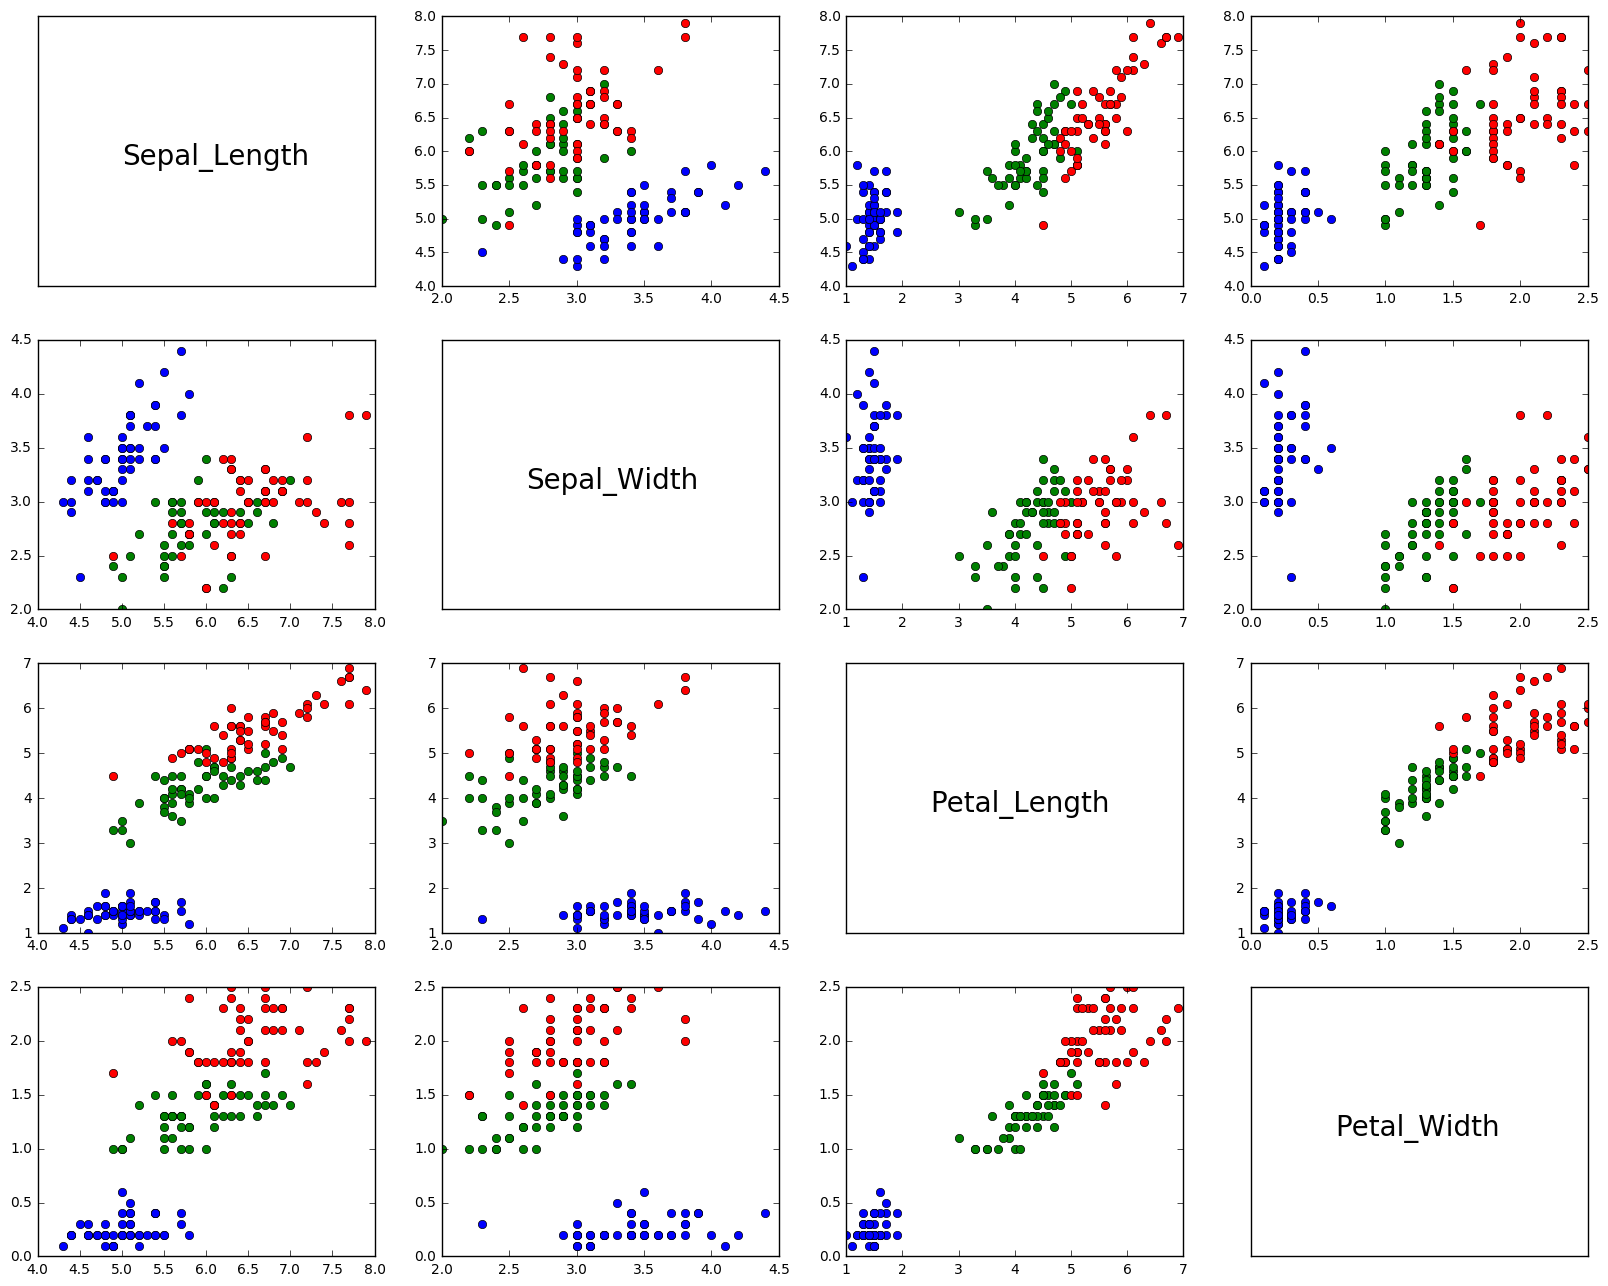

In [3]:
pairs(iris)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

def linreg_iris_2D(data, column_1_label, column_2_label, test_indices):
    iris_x = data[column_1_label].values.reshape(-1, 1)
    iris_y = data[column_2_label].values.reshape(-1, 1)
    
    #test_indices = np.random.choice(iris_X.size, 20)
    train = np.ma.array(range(0, iris_x.size))
    train[test_indices] = np.ma.masked
    train

    # Split the data into training/testing sets
    iris_x_train = iris_x[train]
    iris_x_test = iris_x[test_indices]

    # Split the targets into training/testing sets
    iris_y_train = iris_y[train]
    iris_y_test = iris_y[test_indices]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(iris_x_train, iris_y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(iris_x_test) - iris_y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(iris_x_test, iris_y_test))

    # Plot outputs
    plt.scatter(iris_x_test, iris_y_test,  color='black')
    plt.plot(iris_x_test, regr.predict(iris_x_test), color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Sepal_Length against Sepal_Width:
Coefficients: 
 [[-0.05726823]]
Mean squared error: 0.40
Variance score: 0.01


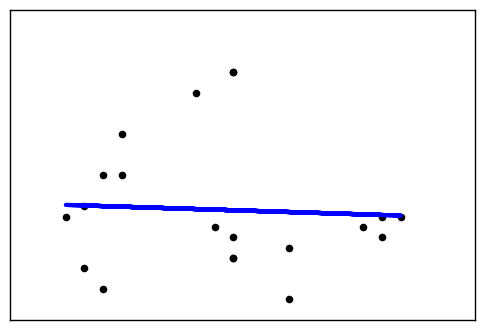

Sepal_Length against Petal_Length:
Coefficients: 
 [[ 1.85750967]]
Mean squared error: 1.24
Variance score: 0.42


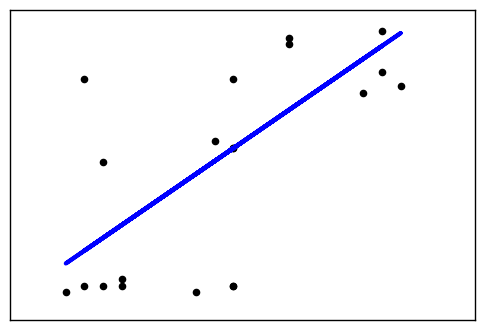

Sepal_Length against Petal_Width:
Coefficients: 
 [[ 0.75384088]]
Mean squared error: 0.22
Variance score: 0.39


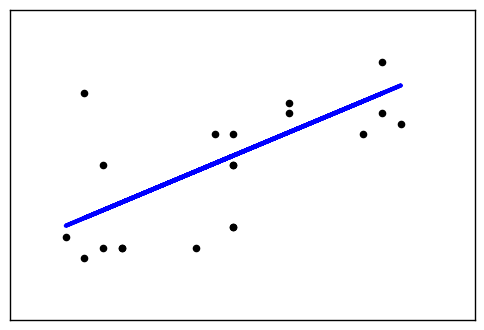

Sepal_Width against Sepal_Length:
Coefficients: 
 [[-0.20887029]]
Mean squared error: 0.37
Variance score: -0.14


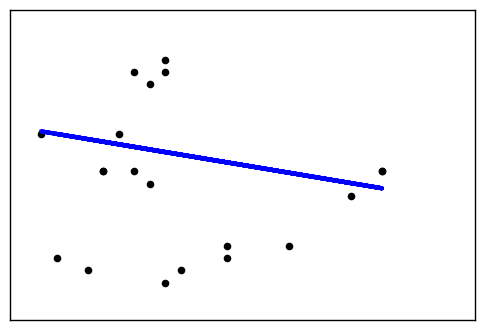

Sepal_Width against Petal_Length:
Coefficients: 
 [[-1.71120139]]
Mean squared error: 1.29
Variance score: 0.40


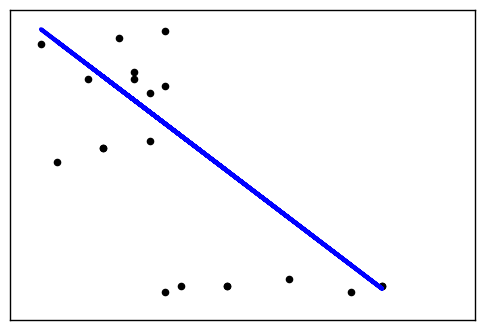

Sepal_Width against Petal_Width:
Coefficients: 
 [[-0.62754618]]
Mean squared error: 0.26
Variance score: 0.27


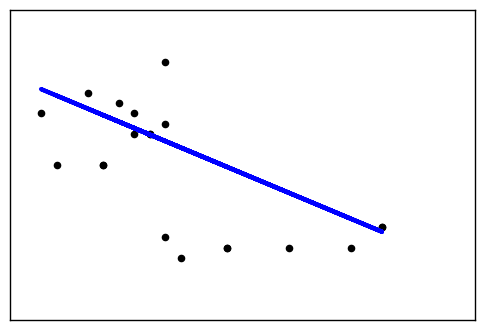

Petal_Length against Sepal_Length:
Coefficients: 
 [[ 0.4091259]]
Mean squared error: 0.23
Variance score: 0.29


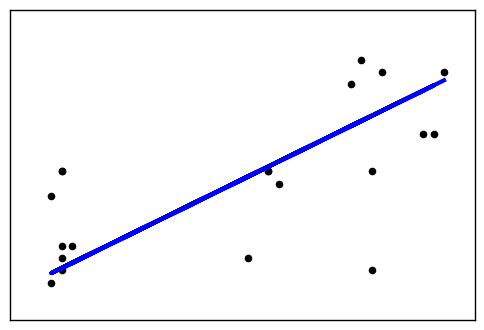

Petal_Length against Sepal_Width:
Coefficients: 
 [[-0.10333897]]
Mean squared error: 0.29
Variance score: 0.29


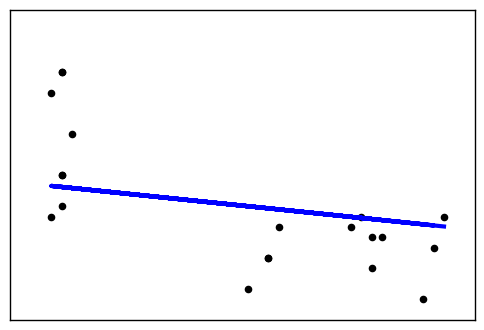

Petal_Length against Petal_Width:
Coefficients: 
 [[ 0.41641913]]
Mean squared error: 0.02
Variance score: 0.95


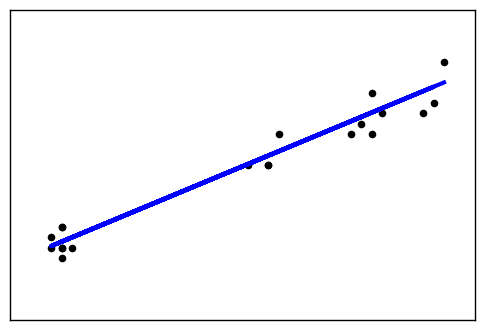

Petal_Width against Sepal_Length:
Coefficients: 
 [[ 0.88751905]]
Mean squared error: 0.22
Variance score: 0.33


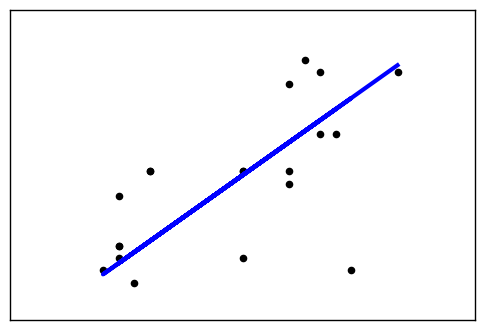

Petal_Width against Sepal_Width:
Coefficients: 
 [[-0.20257264]]
Mean squared error: 0.31
Variance score: 0.22


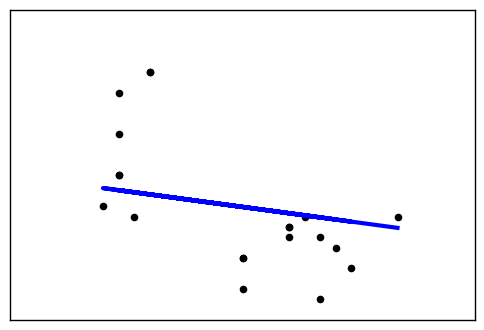

Petal_Width against Petal_Length:
Coefficients: 
 [[ 2.22588531]]
Mean squared error: 0.10
Variance score: 0.95


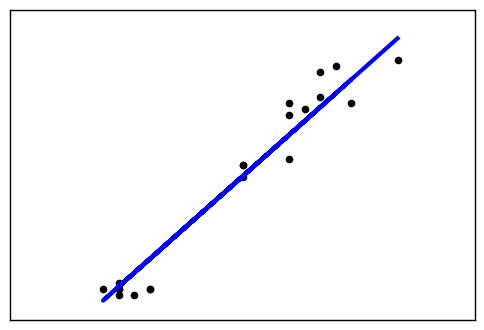

In [5]:
test = np.random.choice(len(iris.index), 20)
for x in iris.columns[:-1]:
    for y in iris.columns[:-1]:
        if x == y:
            continue
        print(str(x) + ' against ' + str(y) + ':')
        linreg_iris_2D(iris, x, y, test)

The best overall linear regression model is between Petal Length and Petal Width (R^2 = 0.95), with a slightly lower MSE when using Petal Width as the predictor for Petal Length (approx. 0.02 vs. 0.10).

Removing the best predicted feature based upon other features (Petal Length being predicted by Petal Width) will have a minimal effect on classification performance.  Since most of the information about Petal Length is already available in Petal Width, classification should still be nearly as good.  Dimensionality reduction techniques would likely pick up on this.